In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
filename =('/content/drive/MyDrive/CODING DOJO/Códigos/Semana 8/cust_seg.csv')
df = pd.read_csv(filename, sep=',')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [45]:
df.drop(columns=['Unnamed: 0','Defaulted'], inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


In [46]:
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,,
1,41,2,6,19,0.124,1.073,6.3
2,47,1,26,100,4.582,8.218,12.8
3,33,2,10,57,6.111,5.802,20.9
4,29,2,4,19,0.681,0.516,6.3
5,47,1,31,253,9.308,8.908,7.2


In [47]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

In [23]:
df=df.dropna(how = 'any')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 53.1 KB


In [49]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)

In [50]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Clusters of clients')

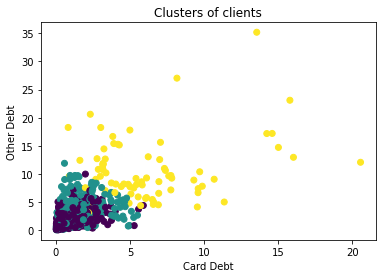

In [62]:
# Guarde las etiquetas del clúster en el marco de datos copy
df['cluster'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df['Card Debt'], df['Other Debt'], c = df['cluster'])
plt.xlabel('Card Debt')
plt.ylabel('Other Debt')
plt.title('Clusters of clients')

Text(0.5, 1.0, 'Clusters of clients')

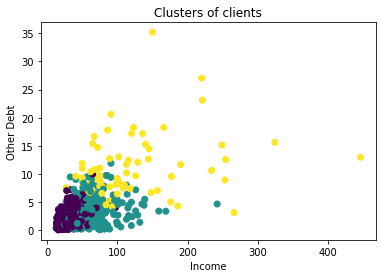

In [64]:
# Visualiza los clusters
plt.scatter(df['Income'], df['Other Debt'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Other Debt')
plt.title('Clusters of clients')

Text(0.5, 1.0, 'Clusters of clients')

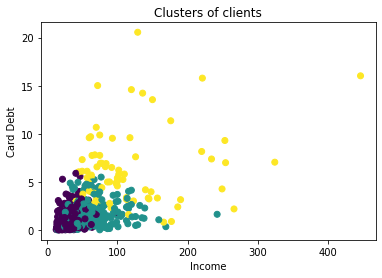

In [65]:
plt.scatter(df['Income'], df['Card Debt'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.title('Clusters of clients')

Text(0.5, 1.0, 'Clusters of clients')

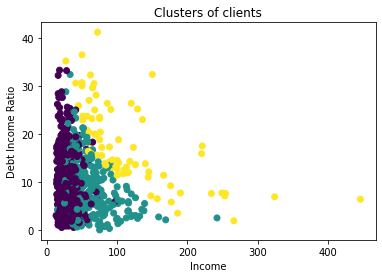

In [66]:
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Debt Income Ratio')
plt.title('Clusters of clients')